In [9]:
import ghost
import pandas as pd
import os
import bids
import ants
from ghost.bids import unity_qa_process_subject
import seaborn as sns
import matplotlib.pyplot as plt
from ghost.phantom import Caliber137
from nilearn import plotting


In [2]:
projdir = '/home/em2876lj/Projects/QA/QA_paper/project'
subses = pd.read_csv(os.path.join(projdir, 'code', 'slurm', 'all_sessions.txt'), delimiter=' ', names=['Subject', 'Session'])
layout = bids.BIDSLayout(root=projdir+'/rawdata', derivatives=projdir+'/derivatives')

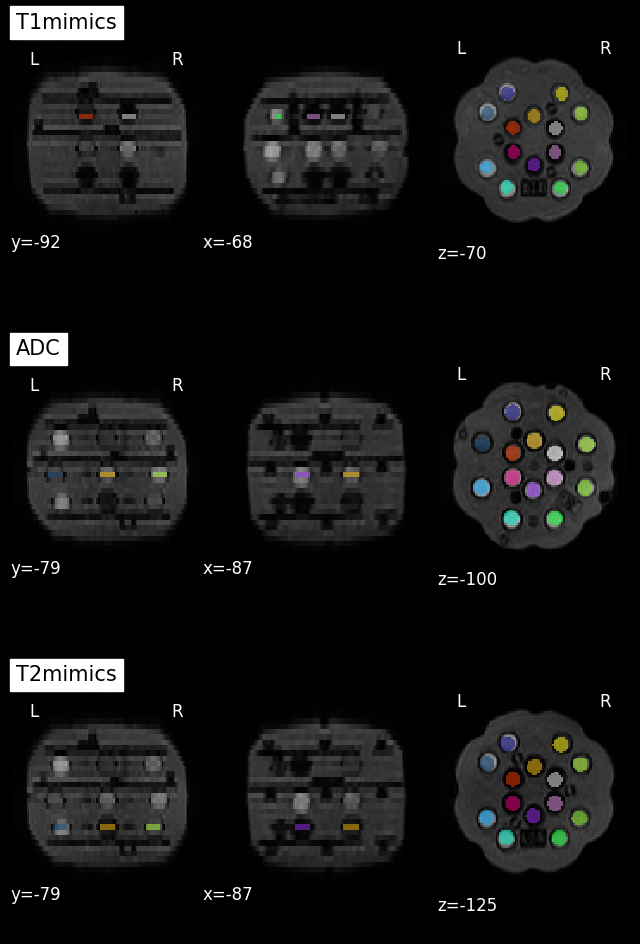

In [10]:
# One example session to do everything
sub = 'P0003'
ses = '20230927164642'
phantom = Caliber137()
axi1 = layout.get(scope='raw', extension='.nii.gz', subject=sub, reconstruction='axi', session=ses, run=1)[0]
axi2 = layout.get(scope='raw', extension='.nii.gz', subject=sub, reconstruction='axi', session=ses, run=2)[0]
sag = layout.get(scope='raw', extension='.nii.gz', subject=sub, reconstruction='sag', session=ses)[0]
fisp = layout.get(scope='raw', extension='.nii.gz', subject=sub, suffix='PDw', session=ses, run=None)[0]

plt.style.use('dark_background')
fig, axes = plt.subplots(3,1, figsize=(8,12))

for i,mimics in enumerate(['T1mimics', 'ADC', 'T2mimics']):
    seg = layout.get(scope='derivatives', suffix='T2w', subject=sub, session=ses, run=1, reconstruction='axi', desc=f'seg{mimics}2D')[0].get_image()
    plotting.plot_roi(seg, bg_img=axi1.get_image(), figure=fig, axes=axes[i], title=mimics, draw_cross=False, alpha=0.5)


In [3]:
layout.get(scope='derivatives', subject='P0004', session='20230629100751', extension='.txt')

[<BIDSFile filename='/home/em2876lj/Projects/QA/QA_paper/project/derivatives/sub-P0004/ses-20230629100751/stats/sub-P0004_ses-20230629100751_desc-temperature_PDw.txt'>,
 <BIDSFile filename='/home/em2876lj/Projects/QA/QA_paper/project/derivatives/sub-P0004/ses-20230629100751/stats/sub-P0004_ses-20230629100751_rec-axi_run-01_desc-PSNR_T2w.txt'>]

In [4]:
all_rows = []
for i,row in subses.iterrows():
    
    d = {'Subject':row.Subject, 'Session':row.Session, 'PSNR':None, 'Temperature':None}
    
    try:
        temp_f = layout.get(scope='derivatives', subject=row.Subject, session=row.Session, extension='.txt', desc='temperature')[0]
    except:
        print(f'No temp for {row.Subject} {row.Session}')

    with open(temp_f, 'r') as f:
        d['Temperature'] = float(f.readline())

    try:
        psnr_f = layout.get(scope='derivatives', subject=row.Subject, session=row.Session, extension='.txt', desc='PSNR')[0]
    except:
        print(f'No PSNR for {row.Subject} {row.Session}')

    with open(psnr_f, 'r') as f:
        d['PSNR'] = float(f.readline())

    all_rows.append(d)

No PSNR for P0020 20240322121526
No temp for P0029 20240301115421
No PSNR for P0029 20240301115421
No temp for P0029 20240319111148
No PSNR for P0029 20240319111148


In [6]:
df = pd.DataFrame(all_rows)               


In [7]:
df

,Subject,Session,PSNR,Temperature
0,P0003,20230927164642,30.935524,14.0
1,P0003,20230928180538,32.701640,14.0
2,P0003,20231003162834,32.855484,14.0
3,P0003,20231004161510,33.278450,22.0
4,P0003,20231005183315,33.045800,16.0
...,...,...,...,...
239,P0039,20240130082431,33.490640,15.0
240,P0039,20240131094822,31.632444,15.0
241,P0039,20240201080215,33.637070,17.0
242,P0039,20240202093220,33.314426,21.0


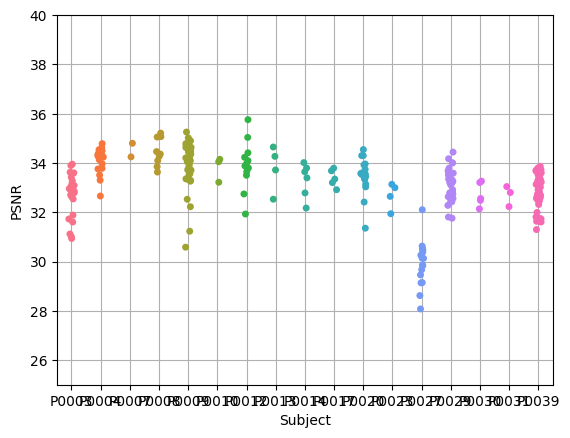

In [20]:
sns.stripplot(data=df, x='Subject', y='PSNR', hue='Subject')
plt.ylim([25,40])
plt.grid()

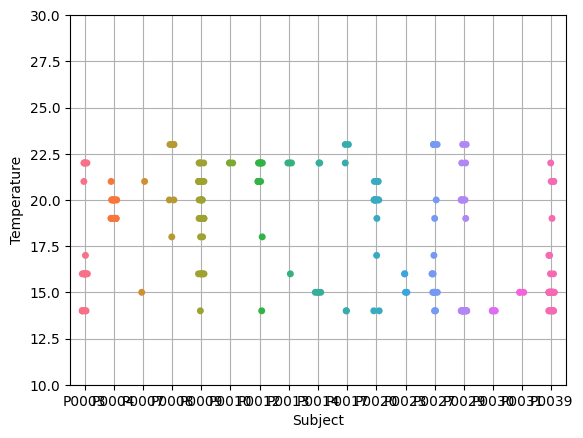

In [23]:
sns.stripplot(data=df, x='Subject', y='Temperature', hue='Subject')
plt.ylim([10,30])
plt.grid()